In [110]:
import requests
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
np.convolve((1, 2, 3, 4, 5) , (6 ,7 , 8, 9 , 10))

array([  6,  19,  40,  70, 110, 114, 106,  85,  50])

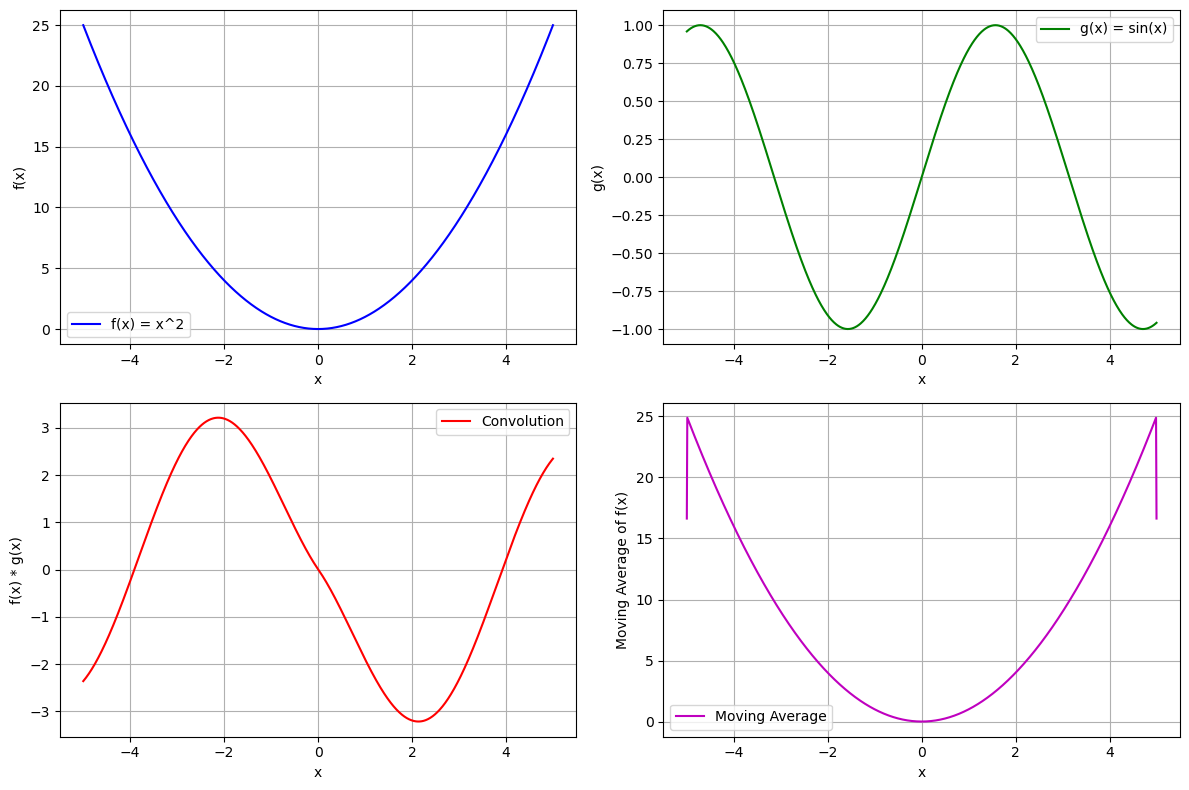

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function 1: f(x) = x^2
def func1(x):
    return x ** 2

# Function 2: g(x) = sin(x)
def func2(x):
    return np.sin(x)

# Convolution of f(x) and g(x)
x = np.linspace(-5, 5, 1000)
convolution = np.convolve(func1(x), func2(x), mode='same') / len(x)

# Moving Average (Rectangular Window) with width 3 and probability 1
window_width = 3
moving_avg = np.convolve(func1(x), np.ones(window_width)/window_width, mode='same')

# Plot all graphs together
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(x, func1(x), label='f(x) = x^2', color='b')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(x, func2(x), label='g(x) = sin(x)', color='g')
plt.legend()
plt.xlabel('x')
plt.ylabel('g(x)')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(x, convolution, label='Convolution', color='r')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x) * g(x)')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(x, moving_avg, label='Moving Average', color='m')
plt.legend()
plt.xlabel('x')
plt.ylabel('Moving Average of f(x)')
plt.grid(True)

plt.tight_layout()
plt.show()


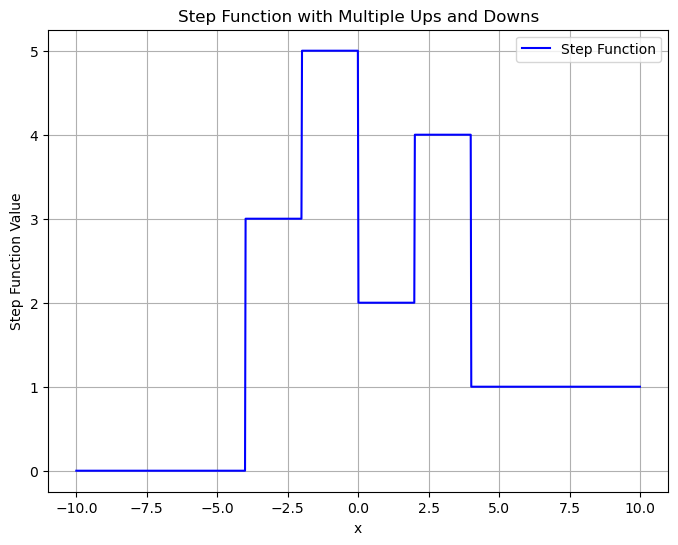

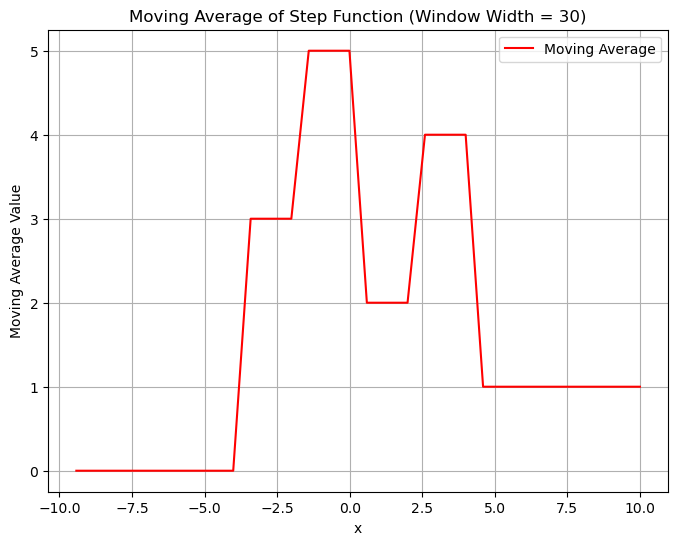

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Step function with multiple ups and downs
def step_function(x):
    if x < -4:
        return 0
    elif -4 <= x < -2:
        return 3
    elif -2 <= x < 0:
        return 5
    elif 0 <= x < 2:
        return 2
    elif 2 <= x < 4:
        return 4
    else:
        return 1

# Moving Average function with rectangular window width = 30 and probability = 1
def moving_average(data, window_width):
    weights = np.ones(window_width) / window_width
    return np.convolve(data, weights, mode='valid')

# Data points for x-axis
x = np.linspace(-10, 10, 1000)

# Calculate step function values
step_values = [step_function(xi) for xi in x]

# Calculate moving average of the step function
window_width = 30
moving_avg_values = moving_average(step_values, window_width)

# Create line plot for step function
plt.figure(figsize=(8, 6))
plt.plot(x, step_values, label='Step Function', color='b')
plt.xlabel('x')
plt.ylabel('Step Function Value')
plt.title('Step Function with Multiple Ups and Downs')
plt.grid(True)
plt.legend()

# Create line plot for moving average
x_moving_avg = x[window_width - 1:]
plt.figure(figsize=(8, 6))
plt.plot(x_moving_avg, moving_avg_values, label='Moving Average', color='r')
plt.xlabel('x')
plt.ylabel('Moving Average Value')
plt.title(f'Moving Average of Step Function (Window Width = {window_width})')
plt.grid(True)
plt.legend()

plt.show()


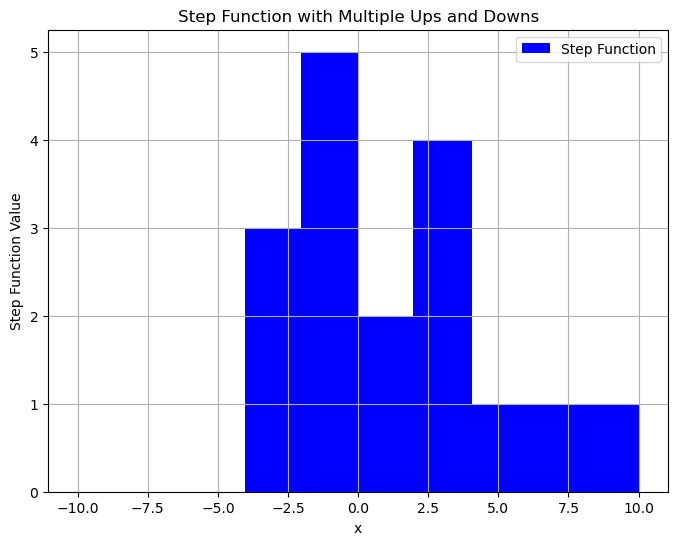

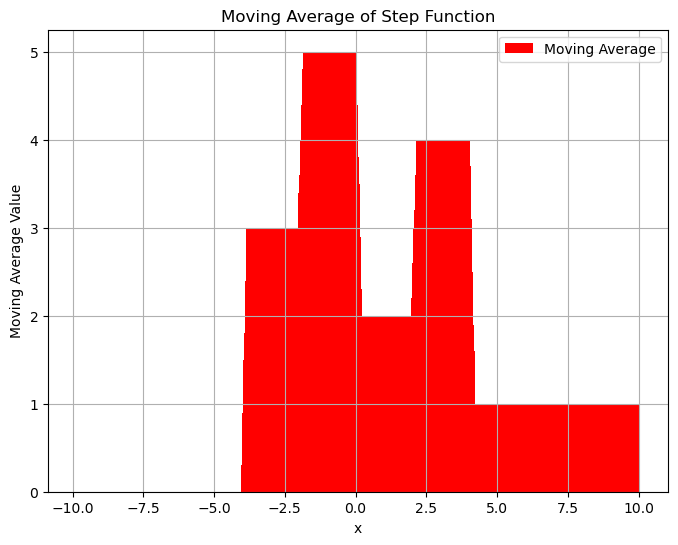

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Step function with multiple ups and downs
def step_function(x):
    if x < -4:
        return 0
    elif -4 <= x < -2:
        return 3
    elif -2 <= x < 0:
        return 5
    elif 0 <= x < 2:
        return 2
    elif 2 <= x < 4:
        return 4
    else:
        return 1

# Moving Average function with rectangular window width = 10 and probability = 1
def moving_average(data, window_width):
    weights = np.ones(window_width) / window_width
    return np.convolve(data, weights, mode='valid')

# Data points for x-axis
x = np.linspace(-10, 10, 1000)

# Calculate step function values
step_values = [step_function(xi) for xi in x]

# Calculate moving average of the step function
window_width = 10
moving_avg_values = moving_average(step_values, window_width)

# Create bar plot for step function
plt.figure(figsize=(8, 6))
plt.bar(x, step_values, width=0.1, label='Step Function', color='b')
plt.xlabel('x')
plt.ylabel('Step Function Value')
plt.title('Step Function with Multiple Ups and Downs')
plt.grid(True)
plt.legend()

# Create bar plot for moving average
x_moving_avg = x[window_width - 1:]
plt.figure(figsize=(8, 6))
plt.bar(x_moving_avg, moving_avg_values, width=0.1, label='Moving Average', color='r')
plt.xlabel('x')
plt.ylabel('Moving Average Value')
plt.title('Moving Average of Step Function')
plt.grid(True)
plt.legend()

plt.show()


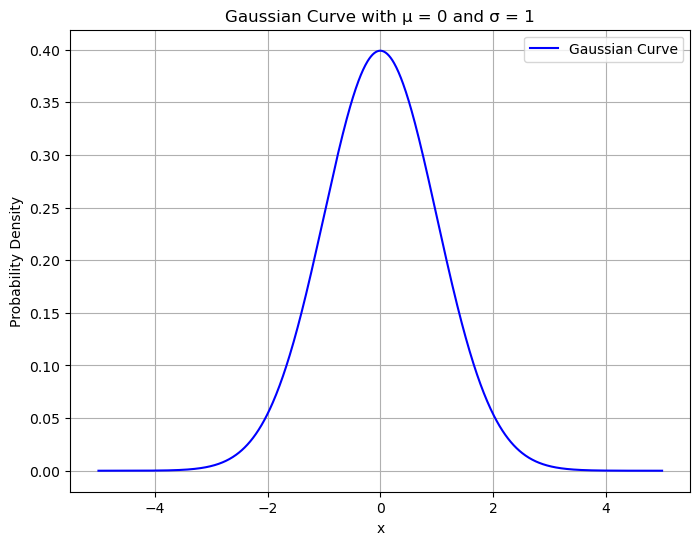

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Data points for x-axis
x = np.linspace(-5, 5, 1000)

# Parameters of the Gaussian curve
mu = 0
sigma = 1

# Calculate Gaussian curve values
gaussian_values = gaussian(x, mu, sigma)

# Plot the Gaussian curve
plt.figure(figsize=(8, 6))
plt.plot(x, gaussian_values, label='Gaussian Curve', color='b')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Gaussian Curve with μ = 0 and σ = 1')
plt.grid(True)
plt.legend()
plt.show()


In [45]:

def conv(image, im_filter):
    # Input dimension
    height = image.shape[0]
    width = image.shape[1]
    
    # Output image with reduced dimensions
    im_c = np.zeros((height - len(im_filter) + 1, width - len(im_filter[0]) + 1))
    
    # Iterate over all rows and columns
    for row in range(len(im_c)):
        for col in range(len(im_c[0])):
            # Apply the filter
            for i in range(len(im_filter)):
                for j in range(len(im_filter[0])):
                    im_c[row, col] += image[row + i, col + j] * im_filter[i][j]
    
    # Fix out-of-bounds values
    im_c[im_c > 255] = 255
    im_c[im_c < 0] = 0
    
    return im_c


In [54]:
# Load the image from the local path
image_path = "nebula1.jpg"
image_rgb = np.asarray(Image.open(image_path).convert("RGB"))


In [55]:
# Convert to grayscale
image_grayscale = np.mean(image_rgb, axis=2, dtype=np.uint8)
image_grayscale

array([[25, 25, 24, ...,  9,  9,  9],
       [25, 25, 24, ...,  9,  9,  9],
       [25, 25, 24, ...,  9,  9,  9],
       ...,
       [ 8,  8,  8, ..., 25, 25, 25],
       [ 8,  8,  8, ..., 24, 24, 24],
       [ 8,  8,  8, ..., 24, 24, 24]], dtype=uint8)

In [56]:
# Apply convolution
output_image = conv(image_grayscale, filter)


Text(0.5, 1.0, 'Original Image')

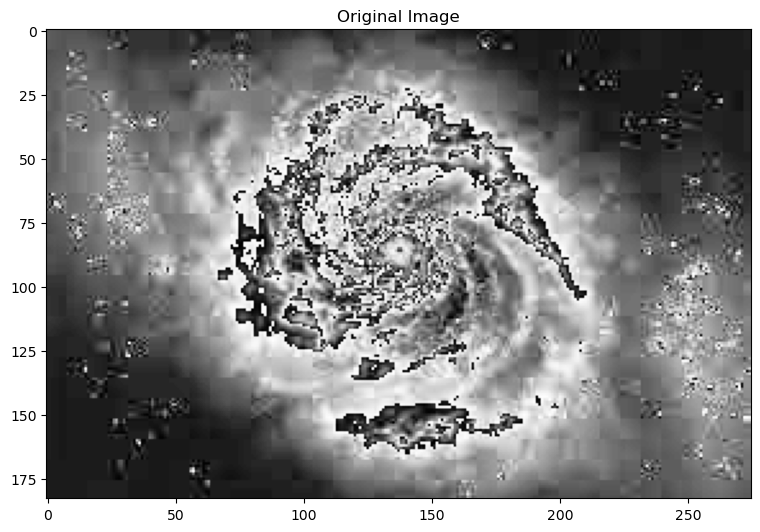

In [57]:
# Plot the original image and the convolved image for comparison
plt.figure(figsize=(20 , 20))
plt.subplot(1, 2, 1)
plt.imshow(image_grayscale, cmap=cm.Greys_r)
plt.title("Original Image")

In [58]:
# Blur filter
blur = np.full((10, 10), 1. / 100)
blurred_image = conv(image_grayscale, blur)

# Sobel edge detectors
sobel_x = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sobel_y = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

sobel_x_image = conv(image_grayscale, sobel_x)
sobel_y_image = conv(image_grayscale, sobel_y)

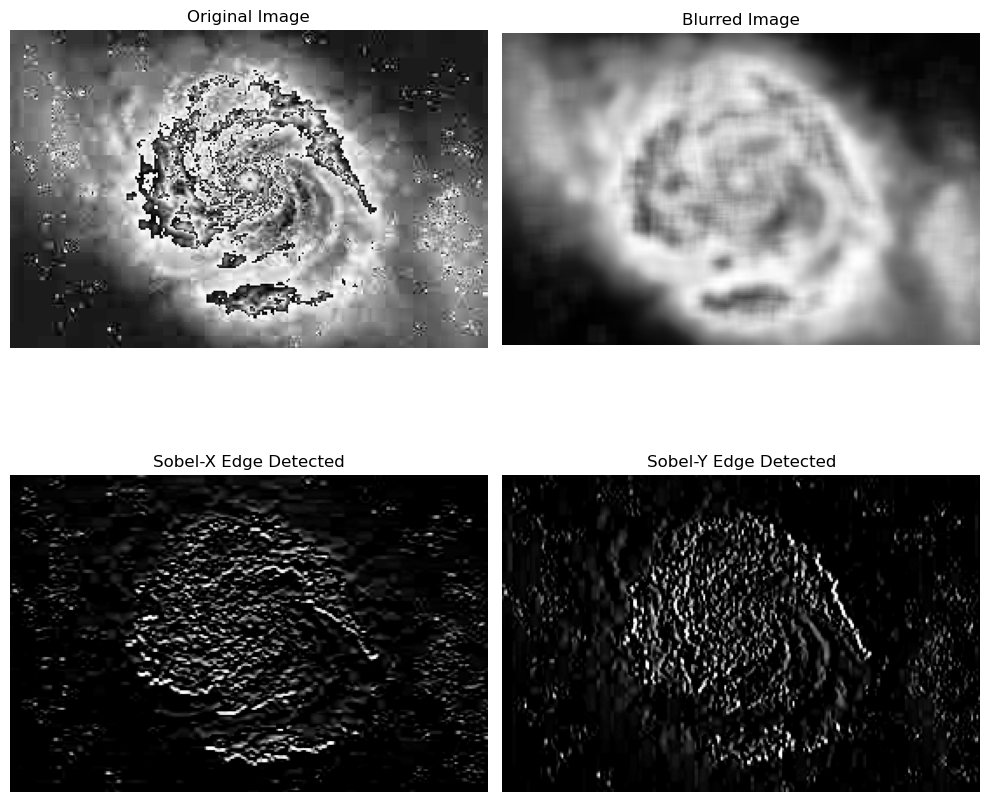

In [59]:
# Plot the images
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(image_grayscale, cmap=cm.Greys_r)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(blurred_image, cmap=cm.Greys_r)
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(sobel_x_image, cmap=cm.Greys_r)
plt.title('Sobel-X Edge Detected')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(sobel_y_image, cmap=cm.Greys_r)
plt.title('Sobel-Y Edge Detected')
plt.axis('off')

plt.tight_layout()
plt.show()

In [78]:
def depthwise_conv_one_to_one(input_slice, kernel):
    output_slice = np.zeros_like(input_slice)
    kernel_size = kernel.shape[0]
    input_size = input_slice.shape[0]

    for i in range(input_size - kernel_size + 1):
        for j in range(input_size - kernel_size + 1):
            output_slice[i, j] = np.sum(input_slice[i:i+kernel_size, j:j+kernel_size] * kernel)

    return output_slice  


In [79]:
def depthwise_conv_one_to_m(input_slice, kernels):
    m = len(kernels)
    output_slices = []

    for kernel in kernels:
        output_slices.append(depthwise_conv_one_to_one(input_slice, kernel))

    return output_slices

In [80]:
# Example input slice and kernel
input_slice = np.array([[2, 4, 1],
                        [3, 5, 8],
                        [7, 6, 9]])

kernel_one_to_one = np.array([[1, 0, 1],
                              [0, 1, 0],
                              [1, 0, 1]])

kernels_one_to_m = [np.array([[1, 0, 1],
                              [0, 1, 0],
                              [1, 0, 1]]),
                    np.array([[0, 1, 0],
                              [1, 0, 1],
                              [0, 1, 0]])]

In [81]:
# One-to-One Relation
output_slice_one_to_one = depthwise_conv_one_to_one(input_slice, kernel_one_to_one)
print("Output Slice (One-to-One):\n", output_slice_one_to_one)

# One-to-m Relation
output_slices_one_to_m = depthwise_conv_one_to_m(input_slice, kernels_one_to_m)
print("\nOutput Slices (One-to-m with m=2):")
for i, output_slice in enumerate(output_slices_one_to_m):
    print(f"\nFilter {i+1}:\n", output_slice)

Output Slice (One-to-One):
 [[24  0  0]
 [ 0  0  0]
 [ 0  0  0]]

Output Slices (One-to-m with m=2):

Filter 1:
 [[24  0  0]
 [ 0  0  0]
 [ 0  0  0]]

Filter 2:
 [[21  0  0]
 [ 0  0  0]
 [ 0  0  0]]


In [82]:

def conv1d(input_data, kernel):
    input_length = len(input_data)
    kernel_length = len(kernel)
    output_length = input_length - kernel_length + 1
    output_data = np.zeros(output_length)

    # Apply shared weights (parameter sharing) across different positions of input data
    for i in range(output_length):
        output_data[i] = np.sum(input_data[i:i+kernel_length] * kernel)

    return output_data

# Example input data and shared 1D filter (kernel)
input_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
kernel = np.array([2, -1])

# Apply 1D convolution with shared weights
output_data = conv1d(input_data, kernel)
print("Input Data: ", input_data)
print("Shared 1D Filter (Kernel): ", kernel)
print("Output Data after 1D Convolution: ", output_data)


Input Data:  [1 2 3 4 5 6 7 8 9]
Shared 1D Filter (Kernel):  [ 2 -1]
Output Data after 1D Convolution:  [0. 1. 2. 3. 4. 5. 6. 7.]


In [86]:
import graphviz as gv

def visualize_parameter_sharing(w1, w2, w3, w4, w5):
    """Visualizes the concept of parameter sharing in CNNs.

    Args:
        w1: The shared weight.
        w2: The first output channel.
        w3: The second output channel.
        w4: The third output channel.
        w5: The fourth output channel.

    Returns:
        A Graphviz graph object.
    """
    graph = gv.Digraph('parameter_sharing', format='png')
    
    with graph.subgraph(name='layer1') as layer1:
        layer1.attr(rank='same')
        layer1.node('w1', shape='circle', label=w1)

    with graph.subgraph(name='layer2') as layer2:
        layer2.attr(rank='same')
        layer2.node('w2', shape='circle', label=w2)
        layer2.node('w3', shape='circle', label=w3)
        layer2.node('w4', shape='circle', label=w4)
        layer2.node('w5', shape='circle', label=w5)

    # Connect shared weight with output channels
    graph.edge('w1', 'w2')
    graph.edge('w1', 'w3')
    graph.edge('w1', 'w4')
    graph.edge('w1', 'w5')

    return graph

if __name__ == '__main__':
    graph = visualize_parameter_sharing('w1', 'w2', 'w3', 'w4', 'w5')
    graph.view()


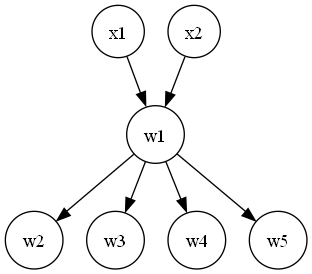

In [89]:
import graphviz as gv
from IPython.display import Image, display

def visualize_parameter_sharing(w1, w2, w3, w4, w5):
    """Visualizes the concept of parameter sharing in CNNs.

    Args:
        w1: The shared weight.
        w2: The first output channel.
        w3: The second output channel.
        w4: The third output channel.
        w5: The fourth output channel.

    Returns:
        A Graphviz graph object.
    """
    graph = gv.Digraph('parameter_sharing', format='png')

    with graph.subgraph(name='inputs') as inputs:
        inputs.node('x1', shape='circle', label='x1')
        inputs.node('x2', shape='circle', label='x2')

    with graph.subgraph(name='layer1') as layer1:
        layer1.attr(rank='same')
        layer1.node('w1', shape='circle', label=w1)

    with graph.subgraph(name='layer2') as layer2:
        layer2.attr(rank='same')
        layer2.node('w2', shape='circle', label=w2)
        layer2.node('w3', shape='circle', label=w3)
        layer2.node('w4', shape='circle', label=w4)
        layer2.node('w5', shape='circle', label=w5)

    # Connect inputs to the shared weight
    graph.edge('x1', 'w1')
    graph.edge('x2', 'w1')

    # Connect shared weight with output channels
    graph.edge('w1', 'w2')
    graph.edge('w1', 'w3')
    graph.edge('w1', 'w4')
    graph.edge('w1', 'w5')

    return graph

graph = visualize_parameter_sharing('w1', 'w2', 'w3', 'w4', 'w5')
display(Image(graph.render(filename='parameter_sharing', format='png')))


In [95]:
import graphviz as gv

def visualize_sparse_connectivity_below():
    graph = gv.Digraph('sparse_connectivity_below')
    graph.node('x3', shape='circle', label='x3')
    graph.node('s1', shape='circle', label='s1')
    graph.node('s2', shape='circle', label='s2')
    graph.node('s3', shape='circle', label='s3')
    graph.edge('x3', 's1')
    graph.edge('x3', 's2')
    graph.edge('x3', 's3')
    return graph

def visualize_sparse_connectivity_above():
    graph = gv.Digraph('sparse_connectivity_above')
    graph.node('s3', shape='circle', label='s3')
    graph.node('x1', shape='circle', label='x1')
    graph.node('x2', shape='circle', label='x2')
    graph.node('x3', shape='circle', label='x3')
    graph.edge('x1', 's3')
    graph.edge('x2', 's3')
    graph.edge('x3', 's3')
    return graph

if __name__ == '__main__':
    sparse_connectivity_below_graph = visualize_sparse_connectivity_below()
    sparse_connectivity_below_graph.view()

    sparse_connectivity_above_graph = visualize_sparse_connectivity_above()
    sparse_connectivity_above_graph.view()


Epoch 1/5
1688/1688 [==============================] - 23s 13ms/step - loss: 0.1783 - accuracy: 0.9470 - val_loss: 0.0625 - val_accuracy: 0.9837
Epoch 2/5
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0609 - accuracy: 0.9816 - val_loss: 0.0562 - val_accuracy: 0.9845
Epoch 3/5
1688/1688 [==============================] - 22s 13ms/step - loss: 0.0398 - accuracy: 0.9872 - val_loss: 0.0488 - val_accuracy: 0.9863
Epoch 4/5
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0279 - accuracy: 0.9912 - val_loss: 0.0536 - val_accuracy: 0.9865
Epoch 5/5
1688/1688 [==============================] - 24s 14ms/step - loss: 0.0189 - accuracy: 0.9939 - val_loss: 0.0538 - val_accuracy: 0.9867


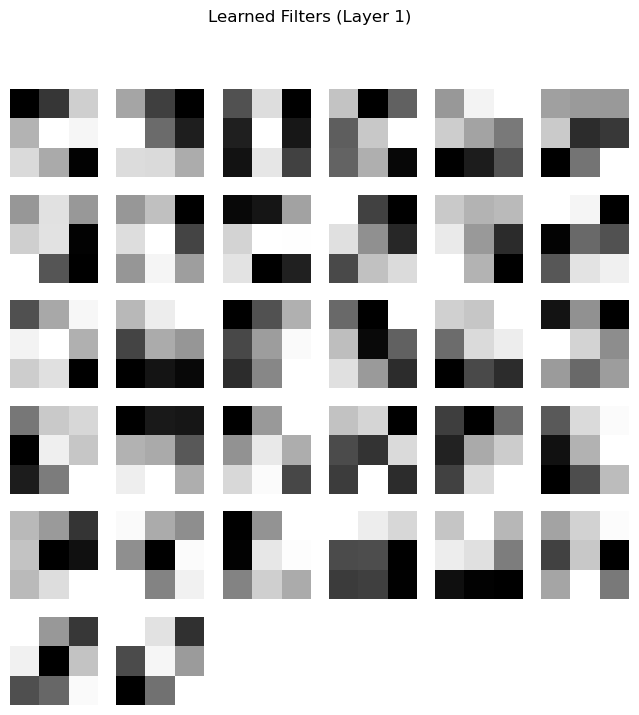

1/1 [==============================] - 0s 56ms/step


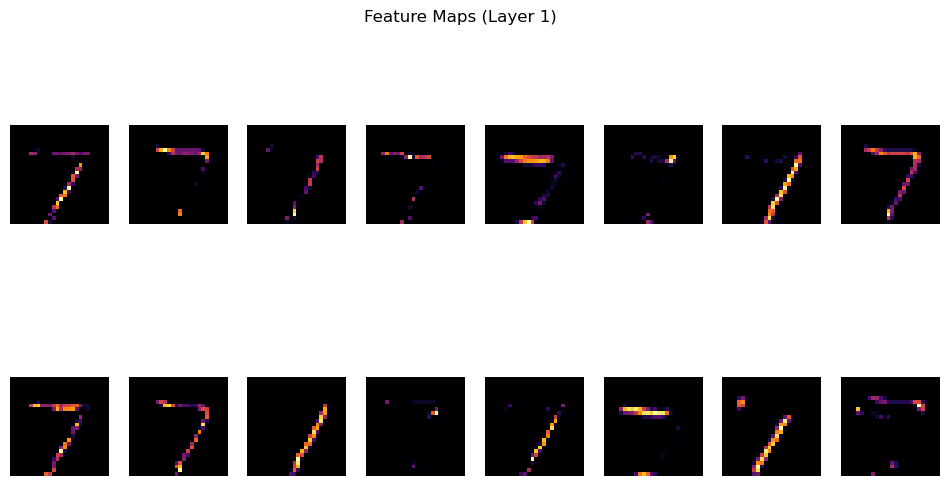

In [111]:

import tensorflow as tf
from tensorflow.keras import layers

# Load the dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the images to add a channel dimension (for grayscale images)
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32')
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32')

# Convert the labels to categorical format
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Build and compile the model
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=5, validation_split=0.1)


# Get the learned filters from the first layer
filters_layer1 = model.layers[0].get_weights()[0]

# Visualize the filters
plt.figure(figsize=(8, 8))
for i in range(32):
    plt.subplot(6, 6, i+1)
    plt.imshow(filters_layer1[..., 0, i], cmap='gray')
    plt.axis('off')
plt.suptitle('Learned Filters (Layer 1)')
plt.show()

# Visualize the feature maps of the first convolutional layer for an input image
sample_image = x_test[0]
activation_model = tf.keras.Model(inputs=model.inputs, outputs=model.layers[0].output)
feature_maps = activation_model.predict(sample_image[np.newaxis, ...])

plt.figure(figsize=(12, 6))
for i in range(16):
    plt.subplot(2, 8, i+1)
    plt.imshow(feature_maps[0, :, :, i], cmap='inferno')
    plt.axis('off')
plt.suptitle('Feature Maps (Layer 1)')
plt.show()


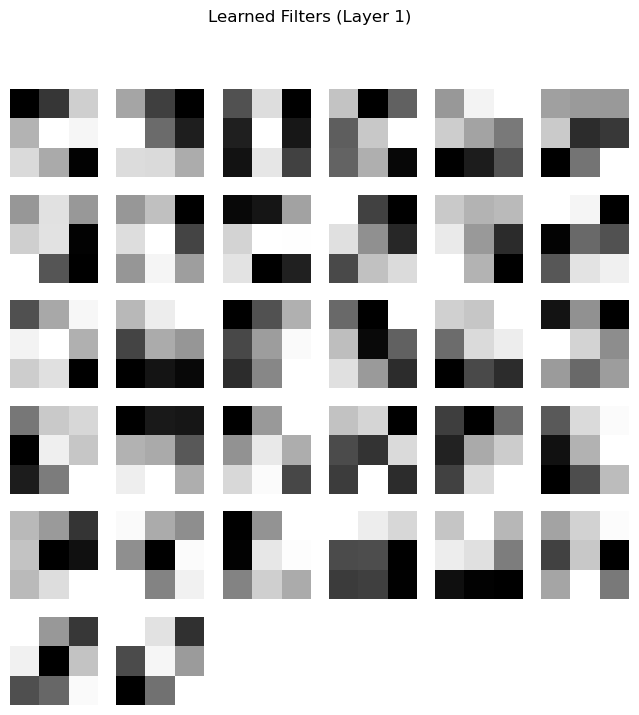

1/1 [==============================] - 0s 47ms/step


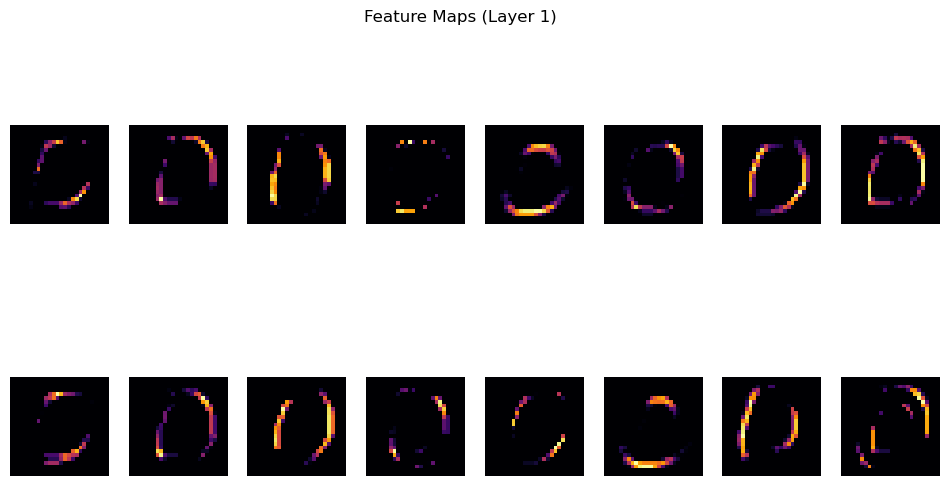

In [112]:
# Get the learned filters from the first layer
filters_layer1 = model.layers[0].get_weights()[0]

# Visualize the filters
plt.figure(figsize=(8, 8))
for i in range(32):
    plt.subplot(6, 6, i+1)
    plt.imshow(filters_layer1[..., 0, i], cmap='gray')
    plt.axis('off')
plt.suptitle('Learned Filters (Layer 1)')
plt.show()

# Visualize the feature maps of the first convolutional layer for an input image
sample_image = x_test[10]
activation_model = tf.keras.Model(inputs=model.inputs, outputs=model.layers[0].output)
feature_maps = activation_model.predict(sample_image[np.newaxis, ...])

plt.figure(figsize=(12, 6))
for i in range(16):
    plt.subplot(2, 8, i+1)
    plt.imshow(feature_maps[0, :, :, i], cmap='inferno')
    plt.axis('off')
plt.suptitle('Feature Maps (Layer 1)')
plt.show()


In [119]:
# Make predictions on a sample image
sample_image = x_test[100]
sample_image = sample_image[np.newaxis, ...]
predicted_probs = model.predict(sample_image)
predicted_label = tf.argmax(predicted_probs, axis=1).numpy()[0]
actual_label = tf.argmax(y_test[100]).numpy()

print(f"Actual Label: {actual_label}, Predicted Label: {predicted_label}")

1/1 [==============================] - 0s 28ms/step
Actual Label: 6, Predicted Label: 6
